In [1]:
import torch

from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/jovyan/.conda/envs/bioblp-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.font_manager

In [3]:
# matplotlib.font_manager.findSystemFonts()

In [4]:
#
# Constants
sns.set(font="Helvetica Neue")
sns.set_context("paper")
sns.set_style("ticks")

sns.set_palette("tab10")

In [5]:
reports_path = Path("/home/jovyan/BioBLP/data/reports/")

In [6]:
metadata_path = "../data/benchmarks/experiments/dpi_fda/1681301749/models/mcs39etm-1681392769-scores.pt"

In [7]:
data = torch.load(metadata_path)

In [8]:
# data[0]

Box plots from wandb export

In [9]:
dpi_r10_results = Path("../data/benchmarks/experiments/DPI/wandb-export-dpi-r10-best.csv")

In [10]:
r10_results_df = pd.read_csv(dpi_r10_results, sep=",")

In [11]:
r10_results_df.head()

,Name,test_AUCPR,test_AUCROC,test_precision,test_recall,model_name,model_feature,model_clf,test_f1,State,...,train_f1,train_precision,train_recall,train_loss,valid_AUCPR,valid_AUCROC,valid_f1,valid_loss,valid_precision,valid_recall
0,major-firebrand-2554,0.383264,0.866430,0.467769,0.454497,transe__RF,transe,RF,0.903388,finished,...,0.958355,0.693366,0.971557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,expert-bee-2586,0.385375,0.881195,0.488330,0.364123,transe__RF,transe,RF,0.907522,finished,...,0.969836,0.756855,0.984474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,valiant-forest-2559,0.389755,0.871312,0.458941,0.505621,transe__RF,transe,RF,0.900857,finished,...,0.944770,0.635980,0.917749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chocolate-plant-2590,0.359469,0.854655,0.367245,0.589558,transe__RF,transe,RF,0.870361,finished,...,0.909179,0.500273,0.921234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cosmic-planet-2557,0.379946,0.863990,0.416342,0.572805,transe__RF,transe,RF,0.888153,finished,...,0.930661,0.575654,0.902623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
feat_labels = ["BioBLP-D", "BioBLP-M", "BioBLP-P", "ComplEx", "Noise", "RotatE", "Structural", "TransE"]
feat_dict = {x.lower().replace("-", ""): x for x in feat_labels}
feat_dict["noise"] = "Random"

def format_results_df(df):
    df["model_feature"] = df["model_feature"].apply(lambda x: feat_dict.get(x, x)) 
    
    df = df.sort_values(by=["model_feature"])
    
    ordered_dfs = [
        df[df["model_feature"] == "Random"],
        df[df["model_feature"].isin(["ComplEx", "RotatE", "TransE"])],
        df[df["model_feature"].isin(["BioBLP-D", "BioBLP-M", "BioBLP-P"])],
    ]
    
    ordered_dfs = pd.concat(ordered_dfs)
    
    
    return ordered_dfs
    

In [13]:

r10_results_df = format_results_df(r10_results_df)

# r10_results_df["model_feature"] = r10_results_df["model_feature"].apply(lambda x: feat_dict.get(x, x))

In [14]:
# rf_results = r10_results_df[r10_results_df["model_clf"] == "RF"].sort_values(by=["model_feature"])



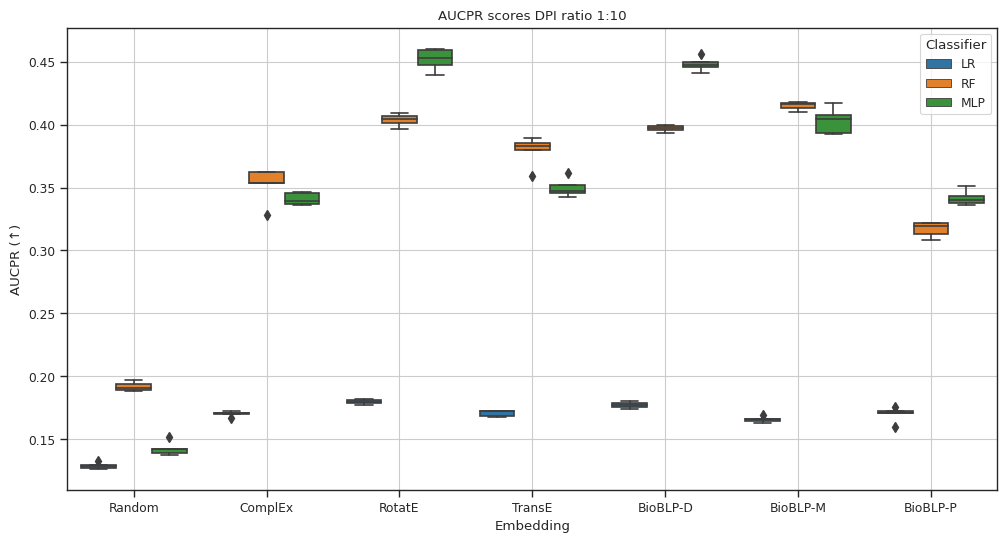

In [15]:
plt.figure(figsize=(12,6))
g = sns.boxplot(data=r10_results_df, x="model_feature", y="test_AUCPR", hue="model_clf")
g.set(xlabel="Embedding")
g.set(ylabel="AUCPR (\u2191)")
g.set(title=u"AUCPR scores DPI ratio 1:10")

plt.grid(axis="both")
plt.legend(title='Classifier')
plt.show()

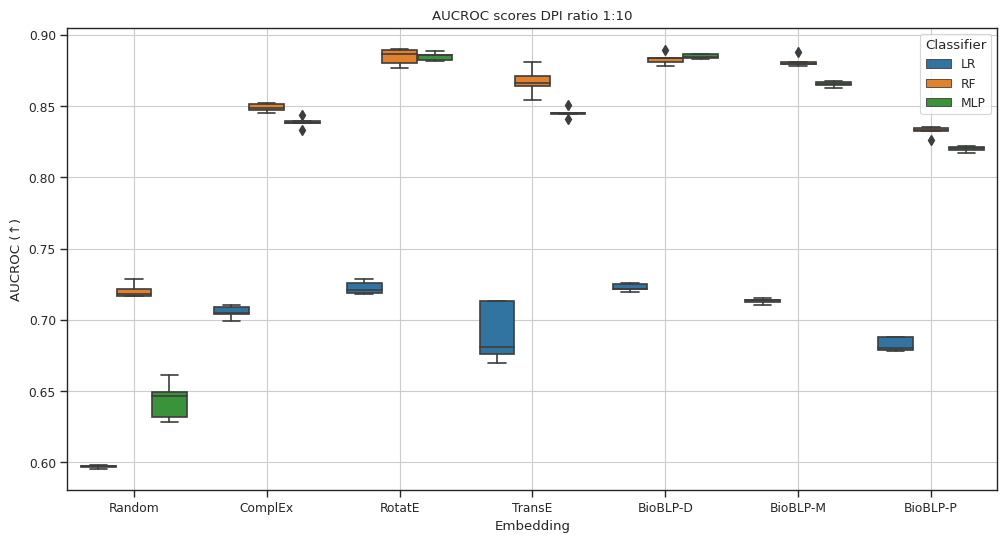

In [16]:
plt.figure(figsize=(12,6))
g = sns.boxplot(data=r10_results_df, x="model_feature", y="test_AUCROC", hue="model_clf")
g.set(xlabel="Embedding")
g.set(ylabel="AUCROC (\u2191)")
g.set(title=u"AUCROC scores DPI ratio 1:10")

plt.grid(axis="both")
plt.legend(title='Classifier')
plt.show()

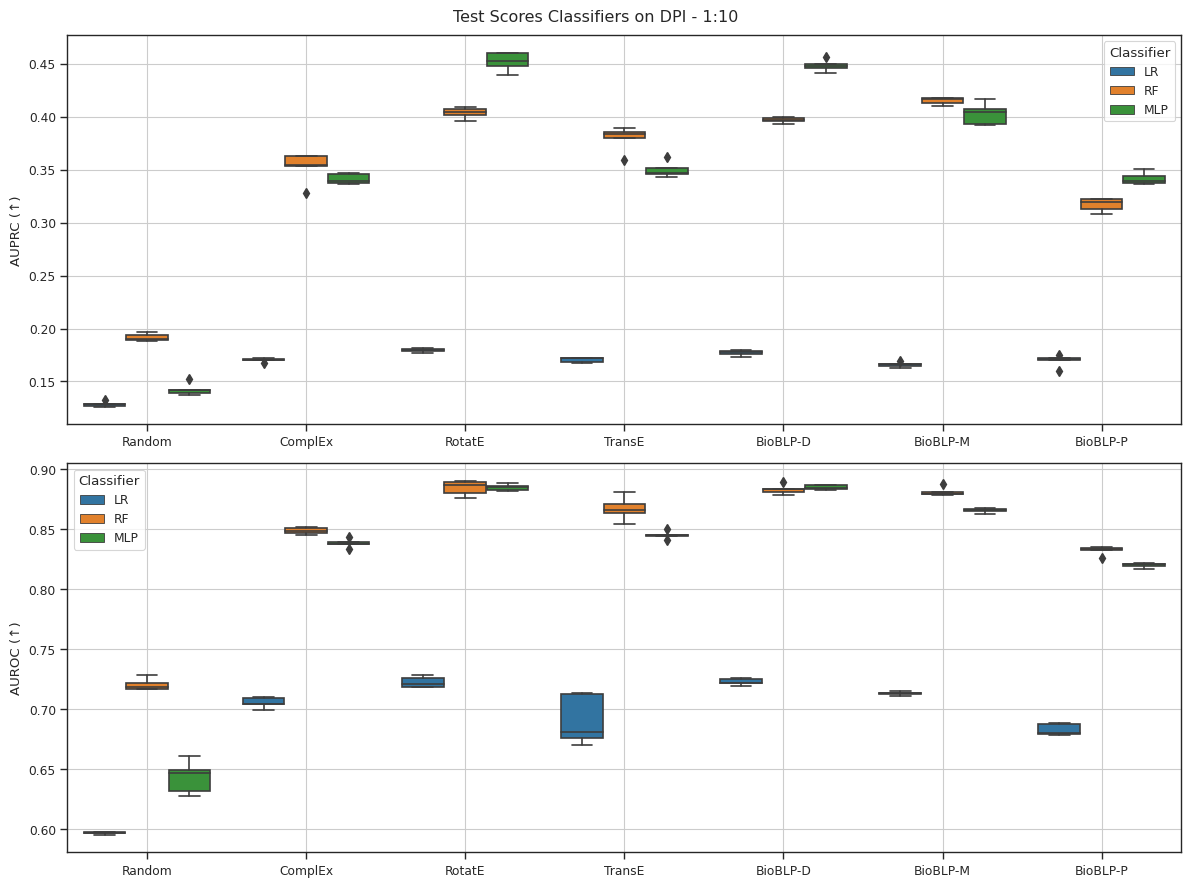

In [17]:

fig, axs = plt.subplots(2, 1, figsize=(12,9))

sns.boxplot(data=r10_results_df, x="model_feature", y="test_AUCPR", hue="model_clf",
            ax=axs[0]).set(ylabel="AUPRC (\u2191)", xlabel="")
# plt.grid()

sns.boxplot(data=r10_results_df, x="model_feature", y="test_AUCROC", hue="model_clf",
            ax=axs[1]).set(ylabel="AUROC (\u2191)", xlabel="")

axs[0].legend(title='Classifier')
axs[1].legend(title='Classifier')

axs[0].grid(axis="both")
axs[1].grid(axis="both")
# sns.despine()
# plt.grid()
plt.suptitle("Test Scores Classifiers on DPI - 1:10")
plt.tight_layout()

plt.savefig(reports_path.joinpath("dpi-r10-all-aucs-box.pdf"), dpi=300, format="pdf")

plt.show()

In [20]:
rf_results = r10_results_df[r10_results_df["model_clf"] == "RF"]

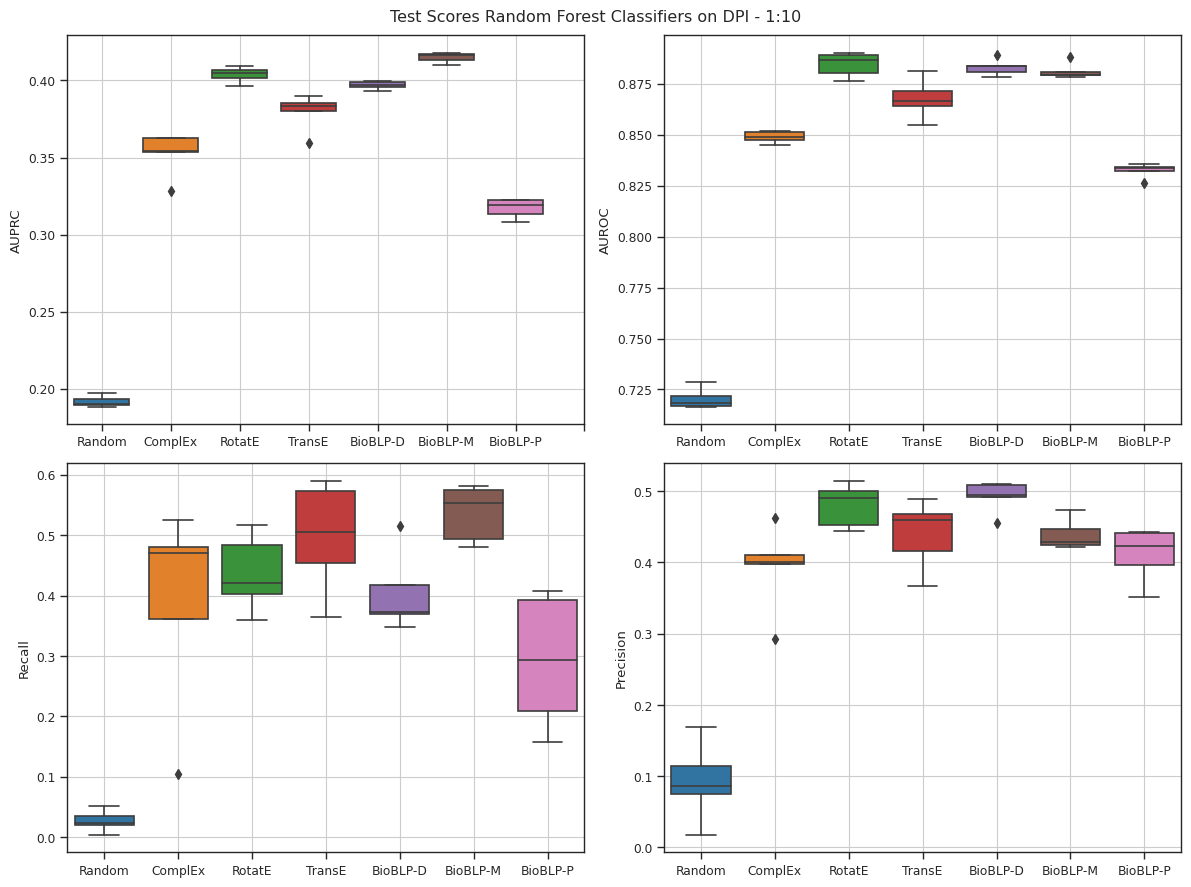

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))


g = sns.boxplot(data=rf_results, x="model_feature", y="test_AUCPR", 
            ax=axs[0, 0]).set(ylabel="AUPRC", xlabel="", xticks=range(len(feat_labels)))

sns.boxplot(data=rf_results, x="model_feature", y="test_AUCROC", 
            ax=axs[0, 1]).set(ylabel="AUROC", xlabel="")
sns.boxplot(data=rf_results, x="model_feature", y="test_recall", 
            ax=axs[1, 0]).set(ylabel="Recall", xlabel="")
sns.boxplot(data=rf_results, x="model_feature", y="test_precision", 
            ax=axs[1, 1]).set(ylabel="Precision", xlabel="")
# sns.despine()

plt.suptitle("Test Scores Random Forest Classifiers on DPI - 1:10")
axs[0][0].grid(axis="both")
axs[0][1].grid(axis="both")
axs[1][0].grid(axis="both")
axs[1][1].grid(axis="both")

plt.tight_layout()
plt.show()

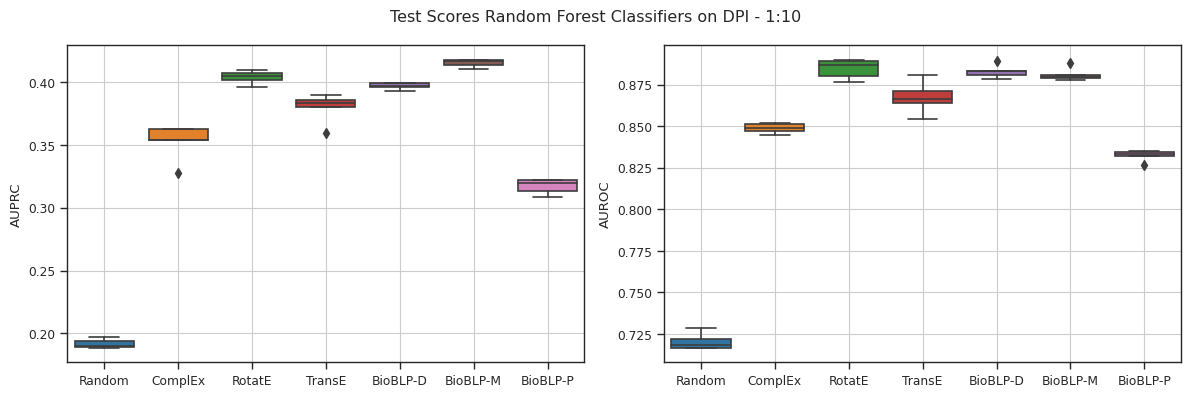

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(data=rf_results, x="model_feature", y="test_AUCPR", 
            ax=axs[0]).set(ylabel="AUPRC", xlabel="")
sns.boxplot(data=rf_results, x="model_feature", y="test_AUCROC", 
            ax=axs[1]).set(ylabel="AUROC", xlabel="")
axs[0].grid(axis="both")
axs[1].grid(axis="both")

# sns.despine()
plt.suptitle("Test Scores Random Forest Classifiers on DPI - 1:10")
plt.tight_layout()

plt.show()

### r 1:1

In [23]:
dpi_r1_results = Path("../data/benchmarks/experiments/DPI/wandb-export-dpi-r1-best.csv")

In [24]:
r1_results_df = pd.read_csv(dpi_r1_results, sep=",")

r1_results_df = format_results_df(r1_results_df)


r1_results_df.head()

,Name,test_AUCPR,test_AUCROC,test_precision,test_recall,test_f1,model_name,model_feature,model_clf,State,...,train_f1,train_precision,train_recall,train_loss,valid_AUCPR,valid_AUCROC,valid_f1,valid_loss,valid_precision,valid_recall
59,genial-deluge-3182,0.603115,0.603026,0.587849,0.551660,0.582441,noise__LR,Random,LR,finished,...,0.580177,0.584070,0.557020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,avid-blaze-3174,0.576490,0.576455,0.561149,0.507227,0.555213,noise__LR,Random,LR,finished,...,0.577915,0.588209,0.519475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,olive-universe-3202,0.588974,0.593850,0.574246,0.530120,0.568599,noise__LR,Random,LR,finished,...,0.581228,0.588073,0.542461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,serene-shape-3600,0.664223,0.696496,0.644368,0.652302,0.646098,noise__RF,Random,RF,finished,...,0.944889,0.931460,0.960447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,confused-serenity-3628,0.650072,0.683572,0.642373,0.634806,0.640744,noise__RF,Random,RF,finished,...,0.874887,0.866479,0.886368,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:


r1_rf_results = r1_results_df[r1_results_df["model_clf"] == "RF"]



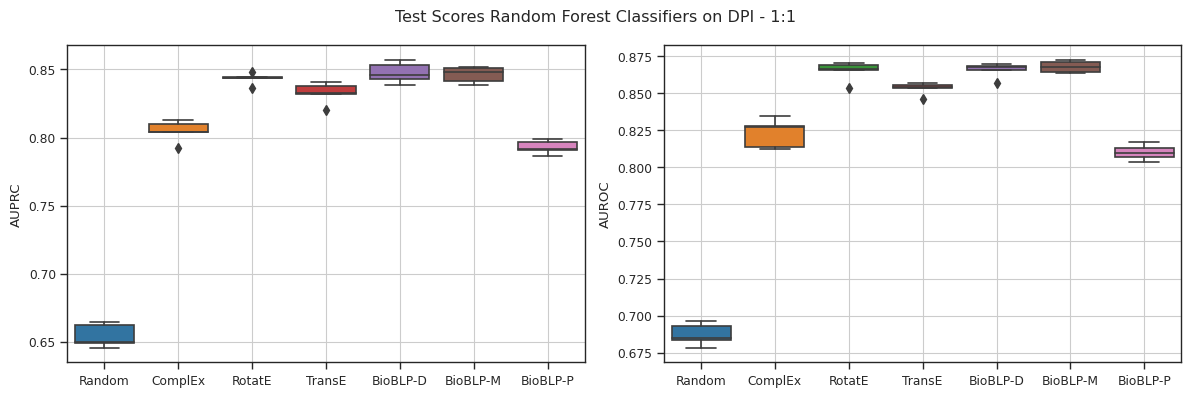

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(data=r1_rf_results, x="model_feature", y="test_AUCPR", 
            ax=axs[0]).set(ylabel="AUPRC", xlabel="")
sns.boxplot(data=r1_rf_results, x="model_feature", y="test_AUCROC", 
            ax=axs[1]).set(ylabel="AUROC", xlabel="")
axs[0].grid(axis="both")
axs[1].grid(axis="both")
# sns.despine()
plt.suptitle("Test Scores Random Forest Classifiers on DPI - 1:1")
plt.tight_layout()

plt.show()

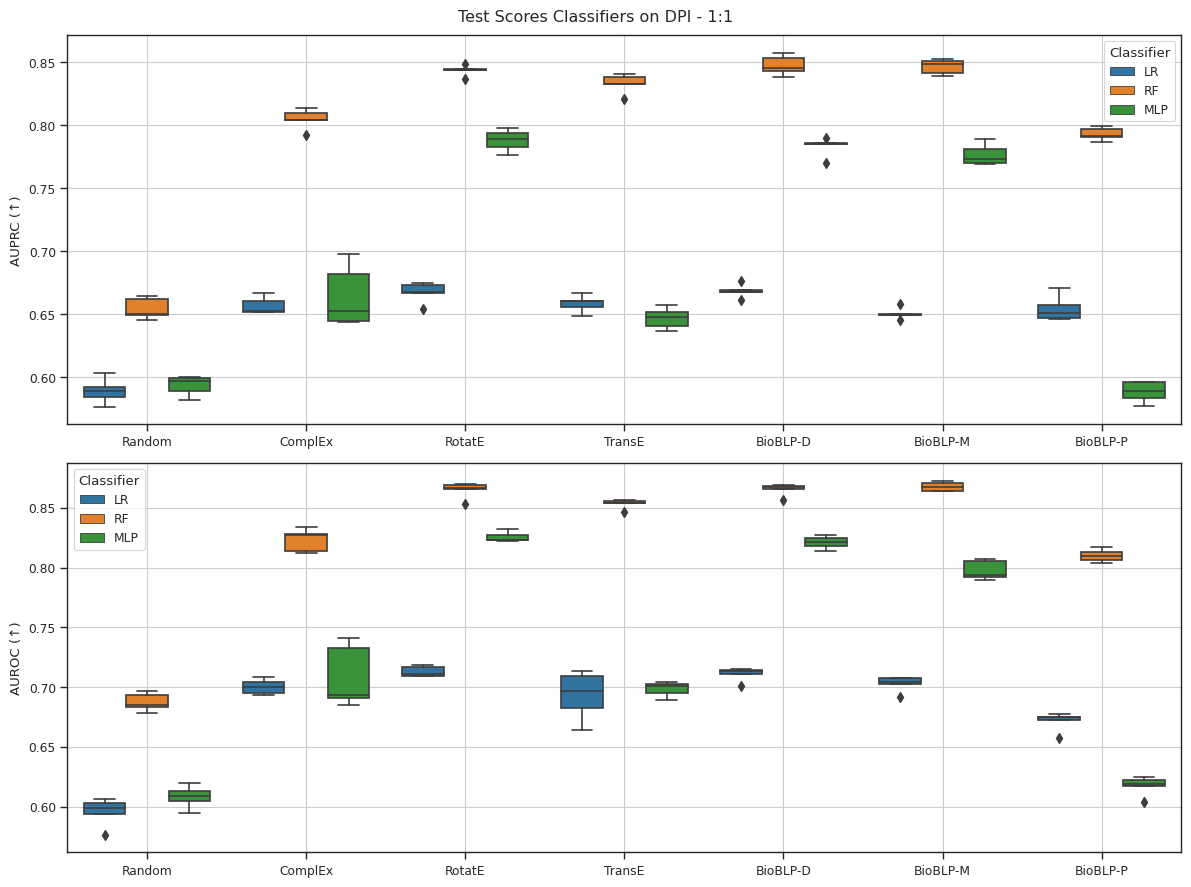

In [28]:

fig, axs = plt.subplots(2, 1, figsize=(12,9))

sns.boxplot(data=r1_results_df, x="model_feature", y="test_AUCPR", hue="model_clf",
            ax=axs[0]).set(ylabel="AUPRC (\u2191)", xlabel="")
# plt.grid()

sns.boxplot(data=r1_results_df, x="model_feature", y="test_AUCROC", hue="model_clf",
            ax=axs[1]).set(ylabel="AUROC (\u2191)", xlabel="")

axs[0].legend(title='Classifier')
axs[1].legend(title='Classifier')

axs[0].grid(axis="both")
axs[1].grid(axis="both")
# sns.despine()
# plt.grid()
plt.suptitle("Test Scores Classifiers on DPI - 1:1")
plt.tight_layout()

plt.savefig(reports_path.joinpath("dpi-r1-all-aucs-box.pdf"), dpi=300, format="pdf")

plt.show()